<a href="https://colab.research.google.com/github/BrianWengier/CAP4630/blob/master/hw2/AIHW2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import models
from keras import layers

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

In [0]:
def digitWidth(vecx):
  leftMost = 27
  rightMost = 0
  for y in range(28):
    for x in range(28):
      if vecx[y*28 + x] > 0:
        if x < leftMost:
          leftMost = x
        if x > rightMost:
          rightMost = x
  return (rightMost - leftMost + 1) / 28

In [0]:
def digitHeight(vecx):
  lowerMost = 28
  upperMost = 0
  for y in range(28):
    for x in range(28):
      if vecx[y*28 + x] > 0:
        if y < lowerMost:
          lowerMost = y
        if y > upperMost:
          upperMost = y
  return (upperMost - lowerMost + 1) / 28

In [0]:
def averageIntensity(vecx):
  pixelSum = 0
  totalPixels = len(vecx)
  for i in range(totalPixels):
    pixelSum += vecx[i]
  return pixelSum / totalPixels

In [0]:
traversed = []

def whiteRegionHelper(vecx, i, j):
  r = -1
  dr = -1
  d = -1
  dl = -1
  l = -1
  ul = -1
  u = -1
  ur = -1
  
  if i < 28:
    r = vecx[(i+1) + j*28]


def digitWhiteRegions(vecx):
  whiteRegions = 0
  for y in range(28):
    for x in range(28):
      index = x + 28*y
      if vecx[index] != 0 && index not in traversed:
        whiteRegions += whiteRegionHelper(vecx, x, y)
  return whiteRegions

29.60969387755102

In [0]:
train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [0]:
train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

In [0]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [0]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [22]:
epochs = 10
history = network.fit(train_images, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(test_images, test_labels))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 6s 103us/step - loss: 0.2587 - acc: 0.9250 - val_loss: 0.1304 - val_acc: 0.9588
Epoch 2/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.1067 - acc: 0.9683 - val_loss: 0.0902 - val_acc: 0.9724
Epoch 3/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.0712 - acc: 0.9784 - val_loss: 0.0803 - val_acc: 0.9744
Epoch 4/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.0522 - acc: 0.9843 - val_loss: 0.0663 - val_acc: 0.9799
Epoch 5/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.0385 - acc: 0.9884 - val_loss: 0.0655 - val_acc: 0.9813
Epoch 6/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.0296 - acc: 0.9911 - val_loss: 0.0647 - val_acc: 0.9807
Epoch 7/10
60000/60000 [=

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

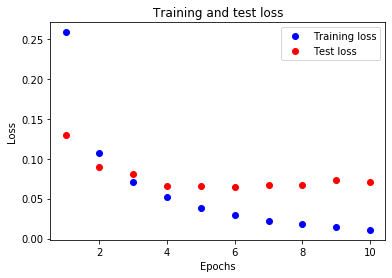

In [24]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

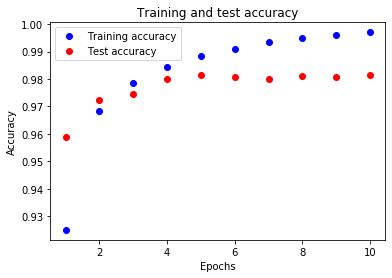

In [26]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()